# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [449]:
# Importação dos dados do arquivo CHURN_TELECON_MOD08_TAREFA.csv
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [451]:
# Verificação dos tipos de dados
df.dtypes

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

<span style="color:red;"># As colunas 'Casado', 'Dependentes' e 'Churn' estão com o tipo object como Yes e No.<br>
Para que essa base fique disponível para modelos de machine learning será colocado os valores 1 e 0.<br>
Antes de fazer a mudança de tipo irei colocar tudo em minúsculo.</span>

In [453]:
# Deixar os campos das colunas Casado, Dependents e Churn em caixa baixa
minuscula = ['Casado', 'Dependents', 'Churn']
df[minuscula] = df[minuscula].apply(lambda x: x.str.lower())
df.head(5)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,yes,no,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,no
1,5575-GNVDE,Male,0,no,no,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,no
2,3668-QPYBK,Male,0,no,no,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,yes
3,7795-CFOCW,Male,0,no,no,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,no
4,9237-HQITU,NaN,0,no,no,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,yes


In [457]:
# Troca do tipo de dados das colunas Casado, Dependents e Churn de yes e no para 1 e 0
substituir_valores = ['Casado', 'Dependents', 'Churn']
pd.set_option('future.no_silent_downcasting', True)
df[substituir_valores] = df[substituir_valores].replace({'yes': 1, 'no': 0})

df.dtypes

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [459]:
# Verificaçãode dados faltantes, trazendo a porcentagem
(df.isnull().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [461]:
df['Genero'].value_counts(normalize=True)

Genero
Male      0.508441
Female    0.487138
M         0.001608
f         0.001608
F         0.001206
Name: proportion, dtype: float64

In [465]:
# Exclusão das linhas faltantes da coluna Genero
df.dropna(subset=['Genero'], inplace=True)

In [467]:
df['Genero'].isnull().sum()

0

<span style="color:red;">As linhas faltantes da coluna Genero foram excluidas por apresentarem uma baixa porcentagem e não interferirem no objetivo da análise.<br>Apenas 12 linhas apresentavam valores faltantes.</span>

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

<span style="color:red;">A coluna Pagamento_Mensal é relevante para nossa análise, por isso será feita a substituição dos valores faltantes</span>

In [469]:
# Calculo da média e da mediana para a coluna Pagamento_Mensal
media = df['Pagamento_Mensal'].mean()
mediana = df['Pagamento_Mensal'].median()

print(f"Média: {media}, Mediana: {mediana}")

Média: 65.60756321839081, Mediana: 71.45


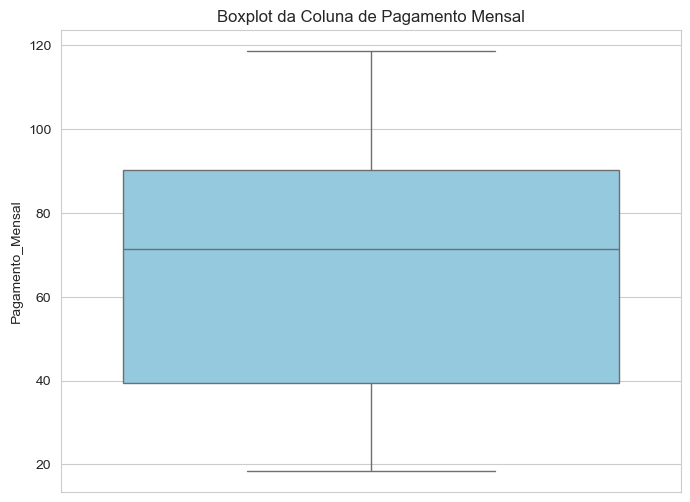

In [471]:
# Gráfico Boxplot para verificar se há outliers
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da Coluna de Pagamento Mensal')
plt.ylabel('Pagamento_Mensal')
plt.show()

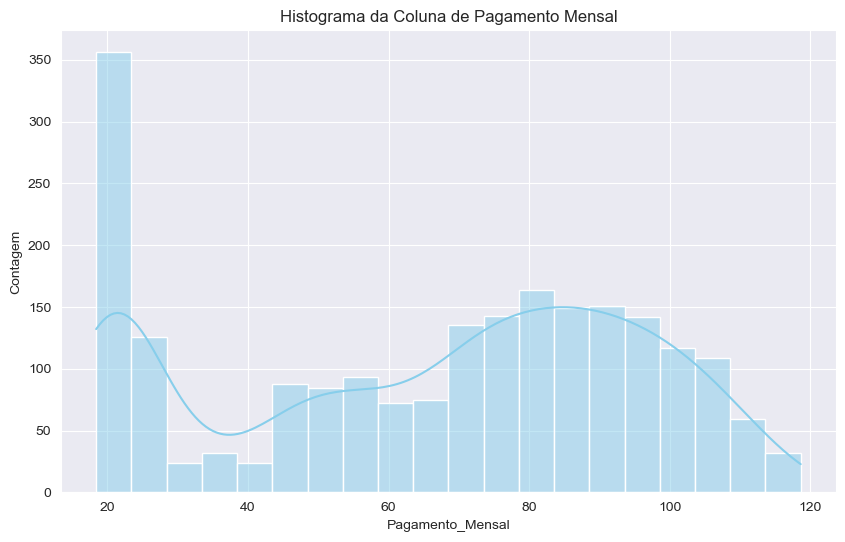

In [473]:
sns.set_style('darkgrid')

# Plotando um histograma da coluna Pagamento_Mensal para análise da distribuição dos dados
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Pagamento_Mensal', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna de Pagamento Mensal')
plt.xlabel('Pagamento_Mensal')
plt.ylabel('Contagem')
plt.show()

<span style="color:red;">Como não há assimetria significativa nos gráficos, os valores ausentes serão substituídos pela média.</span>

In [475]:
# Substituição dos valores ausentes pela media
pagamento = df['Pagamento_Mensal'].mean()
df.fillna({'Pagamento_Mensal': pagamento}, inplace=True)
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].round(2)

In [477]:
df['Pagamento_Mensal'].isnull().sum()

0

<span style="color:red;">A coluna PhoneService tem uma grande porcentagem de valores ausentes (59%). Será feita uma contagem proporcional de usuários que possuem ou não o serviço.</span>

In [479]:
df['PhoneService'].value_counts(normalize=True)

PhoneService
Yes    0.914513
No     0.085487
Name: proportion, dtype: float64

<span style="color:red;">Como a opção 'Yes' possui mais de 90% das ocorrências, os valores ausentes serão substituídos por ela.</span>

In [481]:
# substituição dos campos ausentes por Yes
df.fillna({'PhoneService': 'Yes'}, inplace=True)

In [483]:
df['PhoneService'].isnull().sum()

0

In [441]:
(df.isnull().sum() / len(df)) * 100

customerID            0.0
Genero                0.0
Idoso                 0.0
Casado                0.0
Dependents            0.0
Tempo_como_Cliente    0.0
PhoneService          0.0
Servico_Internet      0.0
Servico_Seguranca     0.0
Suporte_Tecnico       0.0
StreamingTV           0.0
Tipo_Contrato         0.0
PaymentMethod         0.0
Pagamento_Mensal      0.0
Total_Pago            0.0
Churn                 0.0
dtype: float64

<span style="color:red;">Todos os campos estão sem valores nulos ou faltantes, inclusive o'Churn'. Havia 4 linhas do campo que estavam com valores ausentes e que foram excluídas juntamente com as linhas do campo 'Genero'.<br>
A exclusão dessas linhas não cousarão problemas em nossa análise.</span>

<span style="color:red;"><br><br>Após todas as substituições e exclusões será feito abaixo a conversão dos valores das colunas Casado, Dependents e Churn para inteiro.</span>

In [503]:
# Convertendo as colunas Casado, Dependents e Churn em inteiro
# df['Churn'] = df['Churn'].astype(int)
colunas_para_converter = ['Casado', 'Dependents', 'Churn']
df[colunas_para_converter] = df[colunas_para_converter].apply(pd.to_numeric).astype(int)
df.dtypes

customerID             object
Genero                 object
Idoso                   int64
Casado                  int32
Dependents              int32
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                   int32
dtype: object

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [278]:
# Verificação dos valores digitados na coluna Genero
df['Genero'].unique()

array(['Female', 'Male', 'F', 'M', 'f'], dtype=object)

In [284]:
# Substituições dos valores para somente Female e Male
substituicoes = {'F': 'Female', 'f': 'Female', 'M': 'Male'}

df['Genero'] = df['Genero'].replace(substituicoes)

df['Genero'].unique()

array(['Female', 'Male'], dtype=object)

In [286]:
# Verificação dos valores digitados no Servico_Internet
df['Servico_Internet'].unique()

array(['DSL', 'No', 'Fiber optic', 'dsl'], dtype=object)

In [292]:
# Os campos da coluna Servico_Internet serão colocados em caixa baixa
df['Servico_Internet'] = df['Servico_Internet'].str.lower()
df['Servico_Internet'].unique()

array(['dsl', 'no', 'fiber optic'], dtype=object)

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português ou inglês.

In [371]:
# Renomeação das colunas Dependents, PhoneService e PaymentMethod para o português
df.rename(columns={'Dependents': 'Dependentes', 'PhoneService': 'Servico_Telefonico', 'PaymentMethod': 'Metodo_Pagamento'}, inplace=True)

df.head()

,customerID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,1,0,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),65.61,1840.75,0
16,8191-XWSZG,F,0,0,0,52,Yes,No,No internet service,No internet service,No internet service,One year,Mailed check,65.61,1022.95,0
